In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/robertferro/previsao_gastos_por_usuario/main/1%20-%20ETL/dados_pre_processados.csv'

In [3]:
df = pd.read_csv(url)

- Excluindo coluna referente ao id.

In [4]:
df.drop('fullVisitorId',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   visitNumber_ultima        9997 non-null   int64  
 1   channelGrouping_ultima    9997 non-null   object 
 2   date_ultima               9997 non-null   int64  
 3   visitStartTime_ultima     9997 non-null   int64  
 4   browser_ultima            9997 non-null   object 
 5   operatingSystem_ultima    9997 non-null   object 
 6   isMobile_ultima           9997 non-null   bool   
 7   deviceCategory_ultima     9997 non-null   object 
 8   continent_ultima          9997 non-null   object 
 9   subContinent_ultima       9997 non-null   object 
 10  country_ultima            9997 non-null   object 
 11  region_ultima             9997 non-null   object 
 12  metro_ultima              9997 non-null   object 
 13  city_ultima               9997 non-null   object 
 14  networkD

 - Excluindo colunas com muitos dados ausentes.

In [6]:
dados_ausentes = df[['campaignCode_primeira','adContent_primeira','referralPath_primeira','keyword_primeira','isTrueDirect_primeira','isTrueDirect_ultima','campaignCode_ultima','adContent_ultima','referralPath_ultima','keyword_ultima']]

In [7]:
dados_ausentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   campaignCode_primeira  1 non-null      object
 1   adContent_primeira     90 non-null     object
 2   referralPath_primeira  3750 non-null   object
 3   keyword_primeira       4375 non-null   object
 4   isTrueDirect_primeira  1966 non-null   object
 5   isTrueDirect_ultima    2535 non-null   object
 6   campaignCode_ultima    1 non-null      object
 7   adContent_ultima       100 non-null    object
 8   referralPath_ultima    3803 non-null   object
 9   keyword_ultima         4386 non-null   object
dtypes: object(10)
memory usage: 781.1+ KB


In [8]:
for col in dados_ausentes.columns:
  df.drop(col,axis=1,inplace=True)

- Excluindo as colunas referentes a data.

In [9]:
df.drop(columns = ['date_ultima','date_primeira'],axis=1,inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   visitNumber_ultima        9997 non-null   int64  
 1   channelGrouping_ultima    9997 non-null   object 
 2   visitStartTime_ultima     9997 non-null   int64  
 3   browser_ultima            9997 non-null   object 
 4   operatingSystem_ultima    9997 non-null   object 
 5   isMobile_ultima           9997 non-null   bool   
 6   deviceCategory_ultima     9997 non-null   object 
 7   continent_ultima          9997 non-null   object 
 8   subContinent_ultima       9997 non-null   object 
 9   country_ultima            9997 non-null   object 
 10  region_ultima             9997 non-null   object 
 11  metro_ultima              9997 non-null   object 
 12  city_ultima               9997 non-null   object 
 13  networkDomain_ultima      9997 non-null   object 
 14  campaign

## Processamento dos dados.

- Convertendo as variáveis qualitativas para formato numérico.

In [11]:
dados = df.copy()

In [12]:
var_qualitativas = dados.dtypes[dados.dtypes == object].keys()

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder = LabelEncoder()

In [15]:
for col in var_qualitativas:
  encoder=LabelEncoder()
  strings = list(dados[col].values.astype('str'))
  dados[col] = encoder.fit_transform(strings)

In [16]:
dados.head()

,visitNumber_ultima,channelGrouping_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,visitNumber_primeira,channelGrouping_primeira,visitNumber_primeira.1,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,hits,pageviews,bounces,newVisits,transactionRevenue,tempo_dif,total_visitas_usuario,ano_ultima,mes_ultima,dia_ultima
0,1,7,1472974804,7,9,False,0,4,7,135,205,50,286,1652,0,74,6,1,7,1,1472974804,7,9,False,0,0,72,6,1,1,1.0,1.0,0.0,0,1,2016,9,4
1,1,4,1475084026,5,3,False,0,2,11,138,116,20,120,0,0,23,5,1,4,1,1475084026,5,3,False,0,0,20,5,4,3,0.0,1.0,0.0,0,1,2016,9,28
2,1,7,1480996024,5,9,False,0,3,15,101,205,50,286,1106,0,74,6,1,7,1,1480996024,5,9,False,0,0,72,6,2,2,0.0,1.0,0.0,0,1,2016,12,5
3,1,7,1475423502,15,9,False,0,4,7,106,24,0,37,1165,0,74,6,1,7,1,1475423502,15,9,False,0,0,72,6,1,1,1.0,1.0,0.0,0,1,2016,10,2
4,6,2,1492707286,18,6,False,0,2,11,138,205,50,286,333,0,0,0,6,2,6,1492707286,18,6,False,0,0,0,0,2,2,0.0,0.0,0.0,0,1,2017,4,20


In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   visitNumber_ultima        9997 non-null   int64  
 1   channelGrouping_ultima    9997 non-null   int64  
 2   visitStartTime_ultima     9997 non-null   int64  
 3   browser_ultima            9997 non-null   int64  
 4   operatingSystem_ultima    9997 non-null   int64  
 5   isMobile_ultima           9997 non-null   bool   
 6   deviceCategory_ultima     9997 non-null   int64  
 7   continent_ultima          9997 non-null   int64  
 8   subContinent_ultima       9997 non-null   int64  
 9   country_ultima            9997 non-null   int64  
 10  region_ultima             9997 non-null   int64  
 11  metro_ultima              9997 non-null   int64  
 12  city_ultima               9997 non-null   int64  
 13  networkDomain_ultima      9997 non-null   int64  
 14  campaign

- Tratando as colunas do tipo bool.

In [18]:
dados['isMobile_primeira'] = dados['isMobile_primeira'].apply( lambda x: 1 if x == True else 0)
dados['isMobile_ultima'] = dados['isMobile_ultima'].apply( lambda x: 1 if x == True else 0)

- Visualizando a distribuição dos dados.

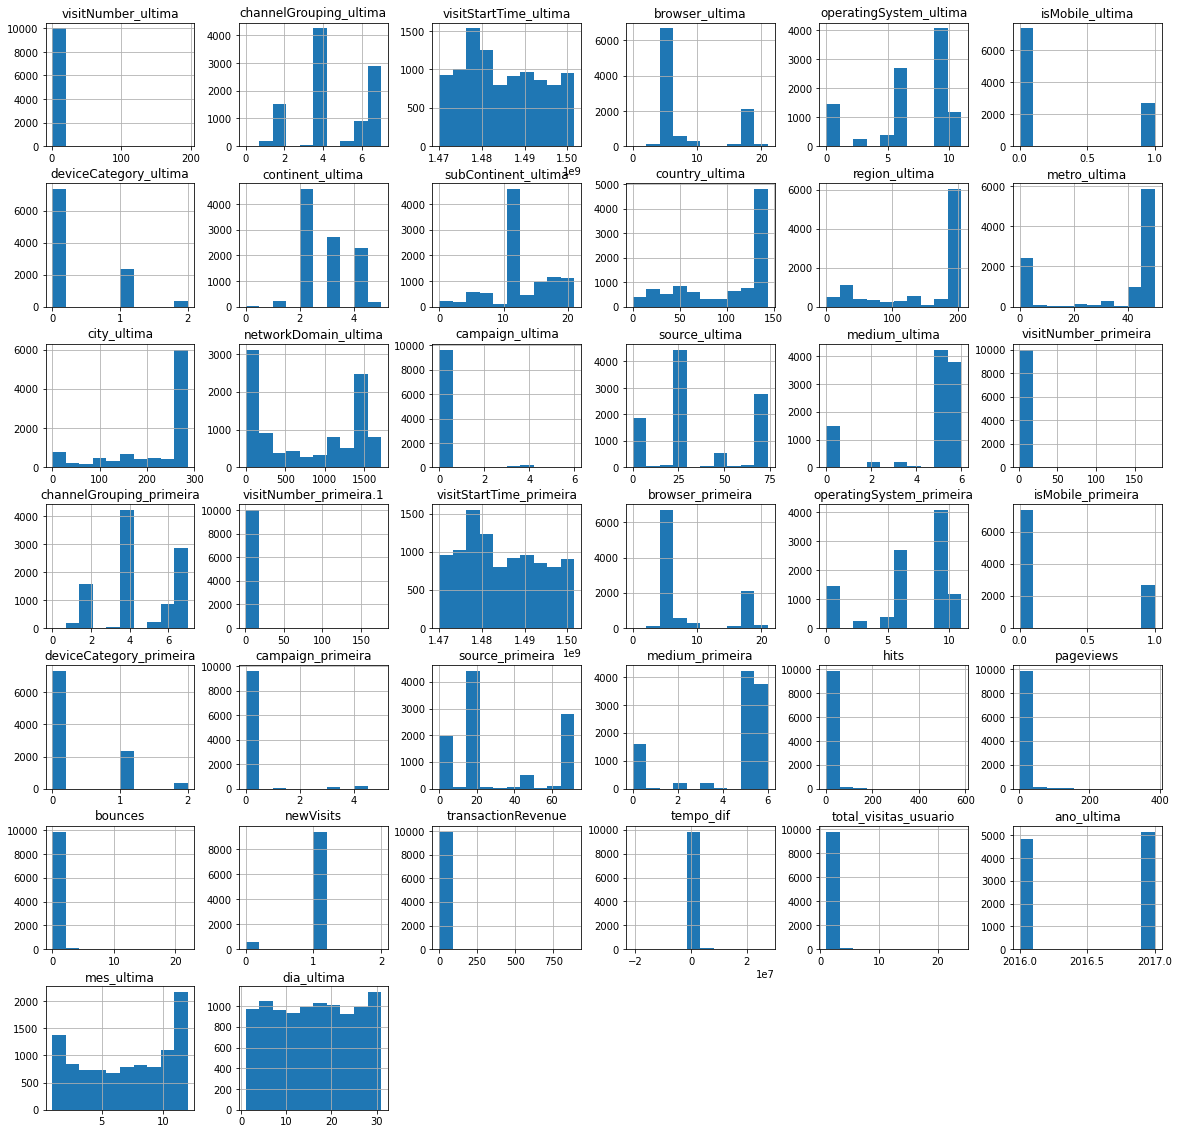

In [19]:
dados.hist(figsize=(20,20))
plt.show()

- Tratando outliers e normalizando os dados.

In [20]:
dados.query('tempo_dif < 0')

,visitNumber_ultima,channelGrouping_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,visitNumber_primeira,channelGrouping_primeira,visitNumber_primeira.1,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,hits,pageviews,bounces,newVisits,transactionRevenue,tempo_dif,total_visitas_usuario,ano_ultima,mes_ultima,dia_ultima
1982,2,6,1477336424,5,6,0,0,2,11,138,114,13,8,0,0,47,6,1,2,1,1477495520,5,6,0,0,0,0,0,27,15,1.0,1.0,0.0,-159096,2,2016,10,24
5396,10,6,1472664529,5,5,0,0,2,11,138,28,43,248,0,0,47,6,1,2,1,1493663042,5,5,0,0,0,0,0,46,35,1.0,1.0,0.0,-20998513,4,2016,8,31
8481,10,4,1474917695,18,11,1,1,2,11,138,205,50,286,1714,0,23,5,1,4,1,1493220529,18,11,1,1,0,20,5,3,3,1.0,1.0,0.0,-18302834,2,2016,9,26


In [21]:
dados_ml = dados.query('tempo_dif >= 0')
dados_ml = dados_ml.reset_index(drop=True)

In [22]:
lista_colunas  = dados_ml.columns

In [23]:
lista_colunas

Index(['visitNumber_ultima', 'channelGrouping_ultima', 'visitStartTime_ultima',
       'browser_ultima', 'operatingSystem_ultima', 'isMobile_ultima',
       'deviceCategory_ultima', 'continent_ultima', 'subContinent_ultima',
       'country_ultima', 'region_ultima', 'metro_ultima', 'city_ultima',
       'networkDomain_ultima', 'campaign_ultima', 'source_ultima',
       'medium_ultima', 'visitNumber_primeira', 'channelGrouping_primeira',
       'visitNumber_primeira.1', 'visitStartTime_primeira', 'browser_primeira',
       'operatingSystem_primeira', 'isMobile_primeira',
       'deviceCategory_primeira', 'campaign_primeira', 'source_primeira',
       'medium_primeira', 'hits', 'pageviews', 'bounces', 'newVisits',
       'transactionRevenue', 'tempo_dif', 'total_visitas_usuario',
       'ano_ultima', 'mes_ultima', 'dia_ultima'],
      dtype='object')

In [24]:
lista_colunas = lista_colunas.drop(['isMobile_ultima','isMobile_primeira','deviceCategory_ultima','deviceCategory_primeira',
                   'continent_ultima','ano_ultima'])

In [25]:
lista_colunas

Index(['visitNumber_ultima', 'channelGrouping_ultima', 'visitStartTime_ultima',
       'browser_ultima', 'operatingSystem_ultima', 'subContinent_ultima',
       'country_ultima', 'region_ultima', 'metro_ultima', 'city_ultima',
       'networkDomain_ultima', 'campaign_ultima', 'source_ultima',
       'medium_ultima', 'visitNumber_primeira', 'channelGrouping_primeira',
       'visitNumber_primeira.1', 'visitStartTime_primeira', 'browser_primeira',
       'operatingSystem_primeira', 'campaign_primeira', 'source_primeira',
       'medium_primeira', 'hits', 'pageviews', 'bounces', 'newVisits',
       'transactionRevenue', 'tempo_dif', 'total_visitas_usuario',
       'mes_ultima', 'dia_ultima'],
      dtype='object')

In [26]:
from sklearn.preprocessing import PowerTransformer

In [27]:
pt = PowerTransformer(standardize=False)

In [28]:
for col in lista_colunas:
  dados_ml[col] = pt.fit_transform(np.array(dados_ml[col]).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


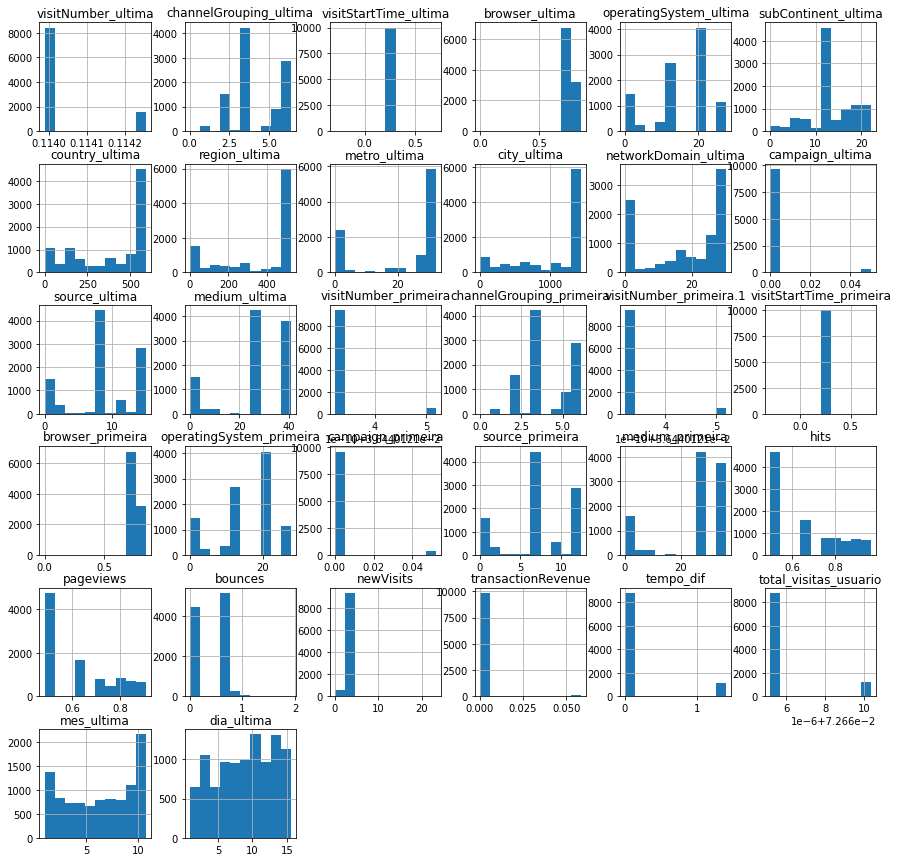

In [29]:
dados_ml[lista_colunas].hist(figsize=(15,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ea56c6b10>,
      dtype=object)

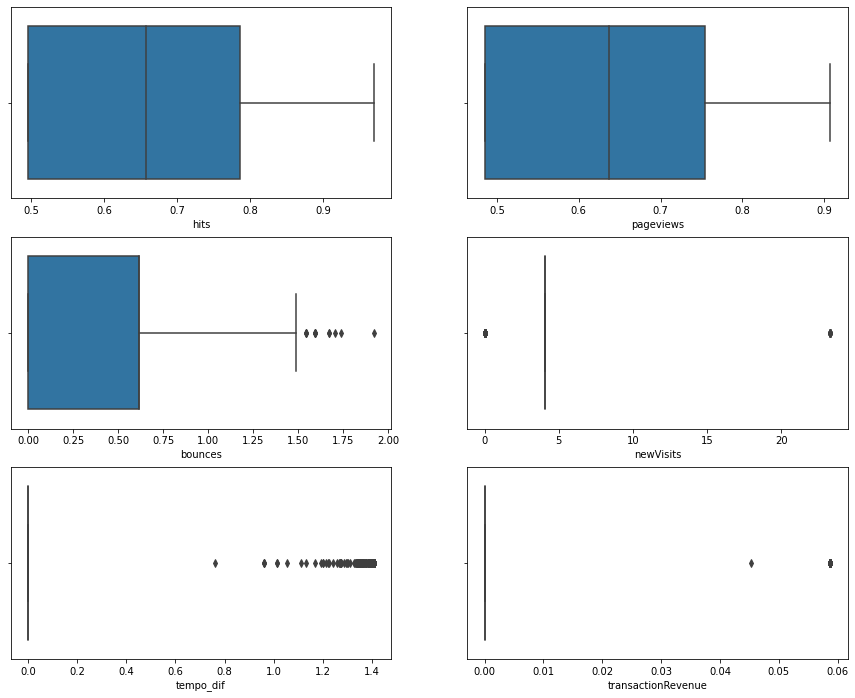

In [30]:
fig,ax = plt.subplots(3,2, figsize=(15,12))


sns.boxplot(ax=ax[0,0],x='hits',data=dados_ml)

sns.boxplot(ax=ax[0,1],x='pageviews',data=dados_ml)

sns.boxplot(ax=ax[1,0],x='bounces',data=dados_ml)

sns.boxplot(ax=ax[1,1],x='newVisits',data=dados_ml)


sns.boxplot(ax=ax[2,0],x='tempo_dif',data=dados_ml)

sns.boxplot(ax=ax[2,1],x='transactionRevenue',data=dados_ml)

ax

## Machine learning

- Separando as variáveis de entrada e de saída.

In [31]:
X = dados_ml.drop('transactionRevenue',axis=1)
Y = dados_ml['transactionRevenue']

In [32]:
X.head()

,visitNumber_ultima,channelGrouping_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,visitNumber_primeira,channelGrouping_primeira,visitNumber_primeira.1,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,hits,pageviews,bounces,newVisits,tempo_dif,total_visitas_usuario,ano_ultima,mes_ultima,dia_ultima
0,0.113989,6.371343,0.203847,0.795191,20.848653,0,0,4,7.248486,542.081778,522.763373,32.137269,1435.890030,30.010328,-0.0,14.966855,40.76712,0.03644,6.123770,0.03644,0.203847,0.795191,20.866615,0,0,-0.0,12.495706,36.193633,0.495357,0.484933,0.616863,4.092123,-0.0,0.072665,2016,8.193222,3.048157
1,0.113989,3.732446,0.203847,0.763388,4.719543,0,0,2,11.487465,558.206025,263.089976,14.487164,452.482688,0.000000,-0.0,7.672954,28.24951,0.03644,3.625041,0.03644,0.203847,0.763388,4.721723,0,0,-0.0,6.321923,25.367940,0.785637,0.711108,-0.000000,4.092123,-0.0,0.072665,2016,8.193222,14.435717
2,0.113989,6.371343,0.203847,0.763388,20.848653,0,0,3,15.762994,368.273566,522.763373,32.137269,1435.890030,26.043815,-0.0,14.966855,40.76712,0.03644,6.123770,0.03644,0.203847,0.763388,20.866615,0,0,-0.0,12.495706,36.193633,0.657606,0.637490,-0.000000,4.092123,-0.0,0.072665,2016,10.780494,3.673243
3,0.113989,6.371343,0.203847,0.839949,20.848653,0,0,4,7.248486,392.742295,39.891956,0.000000,95.733159,26.529483,-0.0,14.966855,40.76712,0.03644,6.123770,0.03644,0.203847,0.839949,20.866615,0,0,-0.0,12.495706,36.193633,0.495357,0.484933,0.616863,4.092123,-0.0,0.072665,2016,9.060282,1.678711
4,0.114254,1.913146,0.203847,0.846563,11.881281,0,0,2,11.487465,558.206025,522.763373,32.137269,1435.890030,16.799837,-0.0,0.000000,0.00000,0.03644,1.877578,0.03644,0.203847,0.846563,11.889598,0,0,-0.0,0.000000,0.000000,0.657606,0.637490,-0.000000,0.000000,-0.0,0.072665,2017,3.763145,11.139270


- Dividindo as amostras de treino e teste

In [33]:
from sklearn.model_selection import train_test_split

In [40]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y, test_size=0.2, random_state=42)

### **LinearRegression**

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X_treino,Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_pred = lr.predict(X_teste)

In [70]:
y_pred.max()

0.010025709518231452

In [45]:
resultados = pd.DataFrame()
resultados['revenue'] = Y_teste
resultados['predict'] = y_pred
resultados['erro'] = lr.predict(X_teste) - Y_teste

In [46]:
resultados.head()

,revenue,predict,erro
3125,-0.0,0.000179,0.000179
1441,-0.0,-0.000638,-0.000638
4510,-0.0,0.003934,0.003934
39,-0.0,0.001130,0.001130
4509,-0.0,0.001392,0.001392


- Como em alguns está sendo previsto um valor negativo a ser gasto, será feito um ajuste quanto a isso.

In [47]:
y_pred[y_pred < 0] = 0

In [48]:
resultados = pd.DataFrame()
resultados['revenue'] = Y_teste
resultados['predict'] = y_pred
resultados['erro'] = y_pred - Y_teste
resultados.head()

,revenue,predict,erro
3125,-0.0,0.000179,0.000179
1441,-0.0,0.000000,0.000000
4510,-0.0,0.003934,0.003934
39,-0.0,0.001130,0.001130
4509,-0.0,0.001392,0.001392


- Verificando as previsões quando o valor gasto é maior que zero.

In [49]:
resultados[resultados.revenue >0]

,revenue,predict,erro
4768,0.058755,0.003504,-0.055251
532,0.058755,0.003543,-0.055213
9606,0.058755,0.003908,-0.054847
8539,0.058755,0.007534,-0.051221
4076,0.058755,0.002650,-0.056105
8829,0.058755,0.003283,-0.055472
568,0.058755,0.006597,-0.052158
3914,0.058755,0.007798,-0.050958
4907,0.058755,0.008064,-0.050692
416,0.058755,0.004876,-0.053879


- Calculando o erro.

In [50]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

In [52]:
MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)

print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 0.0019
MSE = 0.0000
RMSE = 0.0068
R2 = 0.0693


In [92]:
np.std(dados_ml.transactionRevenue)

0.007039638358202582

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


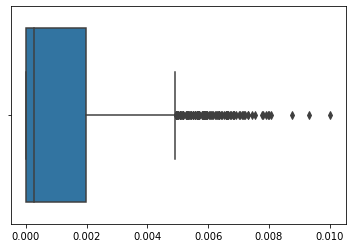

In [54]:
sns.boxplot(y_pred)

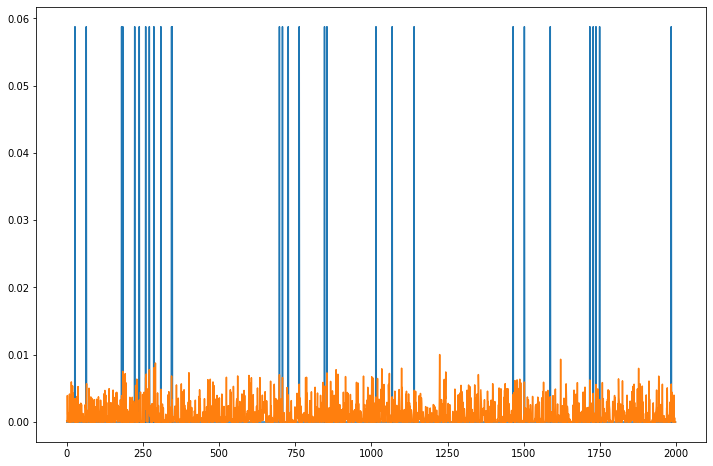

In [55]:
plt.figure(figsize=(12,8))
plt.plot(Y_teste.values)
plt.plot(y_pred)

### **Gradient Boosting**

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
gb = GradientBoostingRegressor(random_state=42)

In [71]:
gb.fit(X_treino,Y_treino)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:
gb.score(X_teste,Y_teste)

0.18150486820980216

In [73]:
y_pred_gb = gb.predict(X_teste)

In [79]:
y_pred_gb[y_pred_gb < 0 ] = 0

In [80]:
resultados_gb = pd.DataFrame()
resultados_gb['revenue'] = Y_teste
resultados_gb['predict'] = y_pred_gb
resultados_gb['erro'] = y_pred_gb - Y_teste
resultados_gb.head()

,revenue,predict,erro
3125,-0.0,0.000017,0.000017
1441,-0.0,0.000015,0.000015
4510,-0.0,0.000204,0.000204
39,-0.0,0.000018,0.000018
4509,-0.0,0.000020,0.000020


In [81]:
resultados_gb[resultados_gb.revenue >0]

,revenue,predict,erro
4768,0.058755,0.009522,-0.049233
532,0.058755,0.007622,-0.051133
9606,0.058755,0.007081,-0.051674
8539,0.058755,0.066378,0.007622
4076,0.058755,0.008107,-0.050649
8829,0.058755,0.003017,-0.055738
568,0.058755,0.023946,-0.034809
3914,0.058755,0.011004,-0.047751
4907,0.058755,0.025813,-0.032942
416,0.058755,0.018083,-0.040672


In [82]:
MAE  = mean_absolute_error(Y_teste,y_pred_gb)
MSE  = mean_squared_error(Y_teste,y_pred_gb)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred_gb))
R2 = r2_score(Y_teste, y_pred_gb)

print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 0.0013
MSE = 0.0000
RMSE = 0.0063
R2 = 0.1830


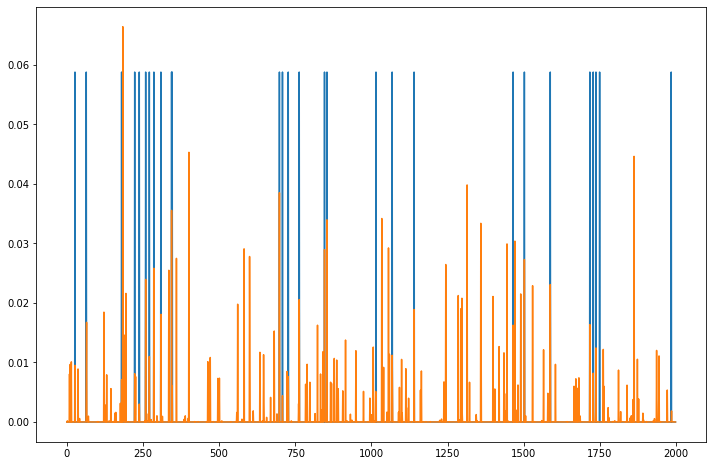

In [83]:
plt.figure(figsize=(12,8))
plt.plot(Y_teste.values)
plt.plot(y_pred_gb)

In [84]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


regressor_list = [
                  LinearRegression(),
                  GradientBoostingRegressor(),
                  DecisionTreeRegressor(random_state=42),
                  RandomForestRegressor(random_state=42),
                  MLPRegressor(random_state=42),
                  XGBRegressor(random_state=42),
                  
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Validation score', val_score.mean())
  print('Test score', test_score)
  print('='*80)

Treinando LinearRegression
Train score 0.07794828654512764
Validation score -387.22457481746017
Test score 0.062425791918164775
Treinando GradientBoostingRegressor
Train score 0.5980538653625765
Validation score 0.21226040995243872
Test score 0.18600429922091233
Treinando DecisionTreeRegressor
Train score 1.0
Validation score -0.5865116989770192
Test score -0.4695956587402046
Treinando RandomForestRegressor
Train score 0.8961632952068995
Validation score 0.22639699362652443
Test score 0.21169465950132094
Treinando MLPRegressor
Train score -6102.298924748701
Validation score -10697.466039130935
Test score -5962.419364702662
Treinando XGBRegressor
[20:21:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:21:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprec

In [86]:
rf = RandomForestRegressor()

In [88]:
rf.fit(X_treino, Y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [89]:
y_pred_rf = rf.predict(X_teste)

In [93]:
MAE  = mean_absolute_error(Y_teste,y_pred_rf)
MSE  = mean_squared_error(Y_teste,y_pred_rf)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred_rf))
R2 = r2_score(Y_teste, y_pred_rf)

print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 0.0013
MSE = 0.0000
RMSE = 0.0063
R2 = 0.1868


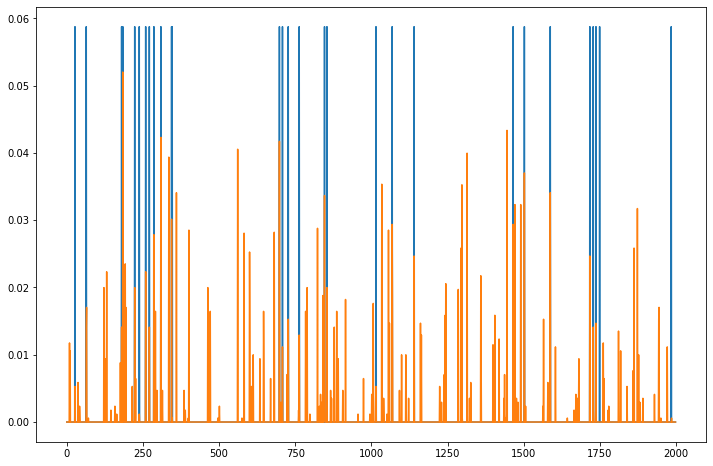

In [106]:
plt.figure(figsize=(12,8))
plt.plot(Y_teste.values)
plt.plot(y_pred_rf)